# Project 11 -- Zeru Zhou

**TA Help:** NA


    
**Collaboration:** NA
    
- Get help from Dr. Ward's video

## Question 1

In [1]:
library(lubridate)

countries <- c('US', 'DE', 'CA', 'FR')


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
# EITHER use a for loop to create the data frame `yt`
yt <- data.frame()
for (c in countries) {
    filename <- paste0("/depot/datamine/data/youtube/", c, "videos.csv")
    dat <- read.csv(filename)
    dat$country_code <- c
    yt <- rbind(yt, dat)
}

In [3]:
dim(yt)

[1] 163394     17

In [4]:
# OR use an sapply function to create the data frame `yt`
myDFlist <- lapply( countries, function(c) {
                    dat <- read.csv(paste0("/depot/datamine/data/youtube/", c, "videos.csv"))
                    dat$country_code <- c
                    return(dat)} )
yt <- do.call(rbind, myDFlist)

In [5]:
dim(yt)

[1] 163394     17

In [3]:
# convert columns to date formats
yt$trending_date <- ydm(yt$trending_date)
yt$publish_time <- ymd_hms(yt$publish_time)


In [4]:
# extract the trending_year and publish_year
yt$trending_year <- year(yt$trending_date)
yt$publish_year <- year(yt$publish_time)

In [5]:
count_tags <- function(tag_vector){
    length(strsplit(tag_vector, "|", fixed=TRUE)[[1]]) 
    }

In [6]:
tag_test <- yt$tags[2]
tag_test
count_tags(tag_test)

[1] "last week tonight trump presidency|last week tonight donald trump|john oliver trump|donald trump"

[1] 4

The function count_tags is created and the example has 4 unique tags.

## Question 2

In [7]:
yt$n_tags <- sapply(yt$tags, count_tags)

In [18]:
head(yt)

video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country_code,trending_year,publish_year,n_tags
<chr>,<date>,<chr>,<chr>,<int>,<dttm>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>
2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/shantellmartin\nCANDICE - https://www.lovebilly.com\n\nfilmed this video in 4k on this -- http://amzn.to/2sTDnRZ\nwith this lens -- http://amzn.to/2rUJOmD\nbig drone - http://tinyurl.com/h4ft3oy\nOTHER GEAR --- http://amzn.to/2o3GLX5\nSony CAMERA http://amzn.to/2nOBmnv\nOLD CAMERA; http://amzn.to/2o2cQBT\nMAIN LENS; http://amzn.to/2od5gBJ\nBIG SONY CAMERA; http://amzn.to/2nrdJRO\nBIG Canon CAMERA; http://tinyurl.com/jn4q4vz\nBENDY TRIPOD THING; http://tinyurl.com/gw3ylz2\nYOU NEED THIS FOR THE BENDY TRIPOD; http://tinyurl.com/j8mzzua\nWIDE LENS; http://tinyurl.com/jkfcm8t\nMORE EXPENSIVE WIDE LENS; http://tinyurl.com/zrdgtou\nSMALL CAMERA; http://tinyurl.com/hrrzhor\nMICROPHONE; http://tinyurl.com/zefm4jy\nOTHER MICROPHONE; http://tinyurl.com/jxgpj86\nOLD DRONE (cheaper but still great);http://tinyurl.com/zcfmnmd\n\nfollow me; on http://instagram.com/caseyneistat\non https://www.facebook.com/cneistat\non https://twitter.com/CaseyNeistat\n\namazing intro song by https://soundcloud.com/discoteeth\n\nad disclosure. THIS IS NOT AN AD. not selling or promoting anything. but samsung did produce the Shantell Video as a 'GALAXY PROJECT' which is an initiative that enables creators like Shantell and me to make projects we might otherwise not have the opportunity to make. hope that's clear. if not ask in the comments and i'll answer any specifics.,US,2017,2017,1
1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with John Oliver (HBO),LastWeekTonight,24,2017-11-13 07:30:00,last week tonight trump presidency|last week tonight donald trump|john oliver trump|donald trump,2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John Oliver discusses what we've learned so far and enlists our catheter cowboy to teach Donald Trump what he hasn't.\n\nConnect with Last Week Tonight online...\n\nSubscribe to the Last Week Tonight YouTube channel for more almost news as it almost happens: www.youtube.com/user/LastWeekTonight\n\nFind Last Week Tonight on Facebook like your mom would: http://Facebook.com/LastWeekTonight\n\nFollow us on Twitter for news about jokes and jokes about news: http://Twitter.com/LastWeekTonight\n\nVisit our official site for all that other stuff at once: http://www.hbo.com/lastweektonight",US,2017,2017,4
5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Lele Pons",Rudy Mancuso,23,2017-11-12 19:05:24,racist superman|rudy|mancuso|king|bach|racist|superman|love|rudy mancuso poo bear black white official music video|iphone x by pineapple|lelepons|hannahstocking|rudymancuso|inanna|anwar|sarkis|shots|shotsstudios|alesso|anitta|brazil|Getting My Driver's License | Lele Pons,3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► https://www.youtube.com/channel/UC5jkXpfnBhlDjqh0ir5FsIQ?sub_confirmation=1\n\nTHANKS FOR WATCHING! LIKE & SUBSCRIBE FOR MORE VIDEOS!\n-----------------------------------------------------------\nFIND ME ON: \nInstagram | http://instagram.com/rudymancuso\nTwitter | http://twitter.com/rudymancuso\nFacebook | http://facebook.com/rudymancuso\n\nCAST: \nRudy Mancuso | http://youtube.com/c/rudymancuso\nLele Pons | http://youtube.com/c/lelepons\nKing Bach | https://youtube.com/user/BachelorsPadTv\n\nVideo Effects: \nCaleb Natale | https://

In [16]:
US_DE <- subset(yt, (country_code=='US')|(country_code=='DE'))

In [17]:
dim(US_DE)

[1] 81789    20

In [19]:
US_DE$video_id[which.max(US_DE$n_tags)]

[1] "4AelFaljd7k"

In [21]:
US_DE$title[which.max(US_DE$n_tags)]

[1] "TOP 20 SINGLE CHARTS ►27. Dezember 2017 [FullHD]"

In [20]:
US_DE$n_tags[which.max(US_DE$n_tags)]

[1] 97

The title is 'TOP 20 SINGLE CHARTS ►27. Dezember 2017 [FullHD]', and the number of tags it contains is 97.

## Question 3

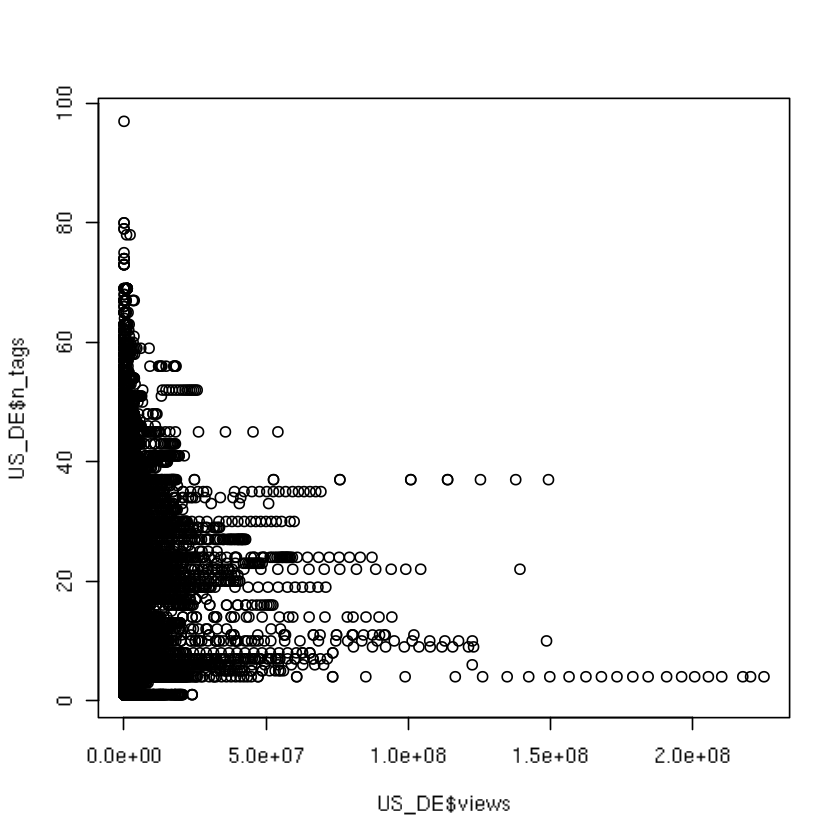

In [22]:
plot(US_DE$views, US_DE$n_tags)

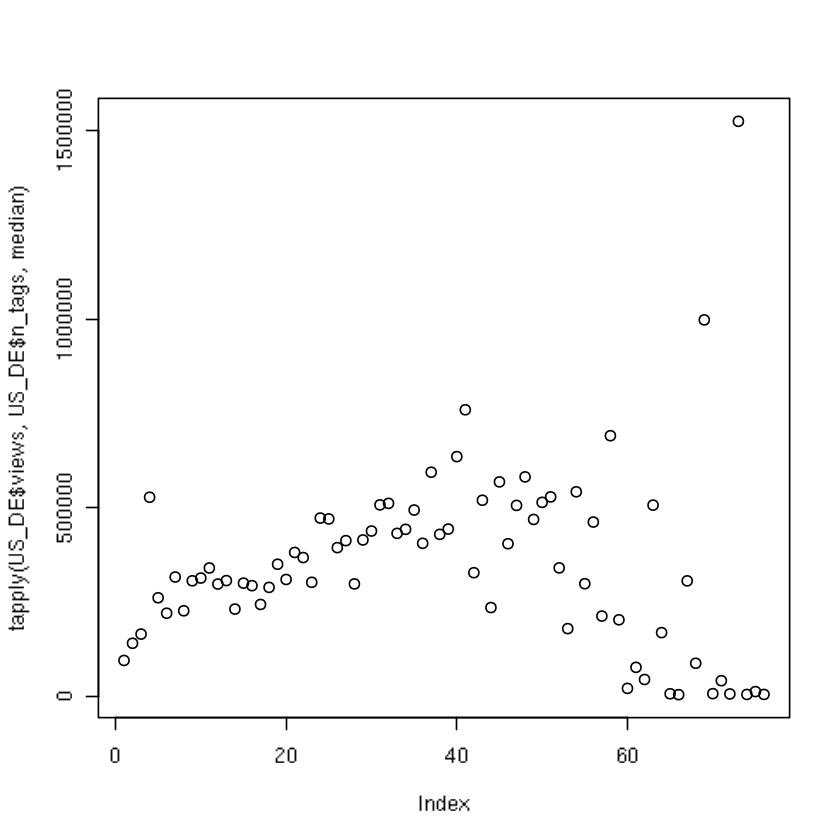

In [24]:
plot(tapply(US_DE$views, US_DE$n_tags, median))

Scatter plot is a little bit messed up. I can only know that it is not a fully positive correlation. By using tapply function and use the median to evaluate the number of views under different number of tags, we can clearly see that when the number of tags is around 40, the median of the number of views is the highest.

## Question 4

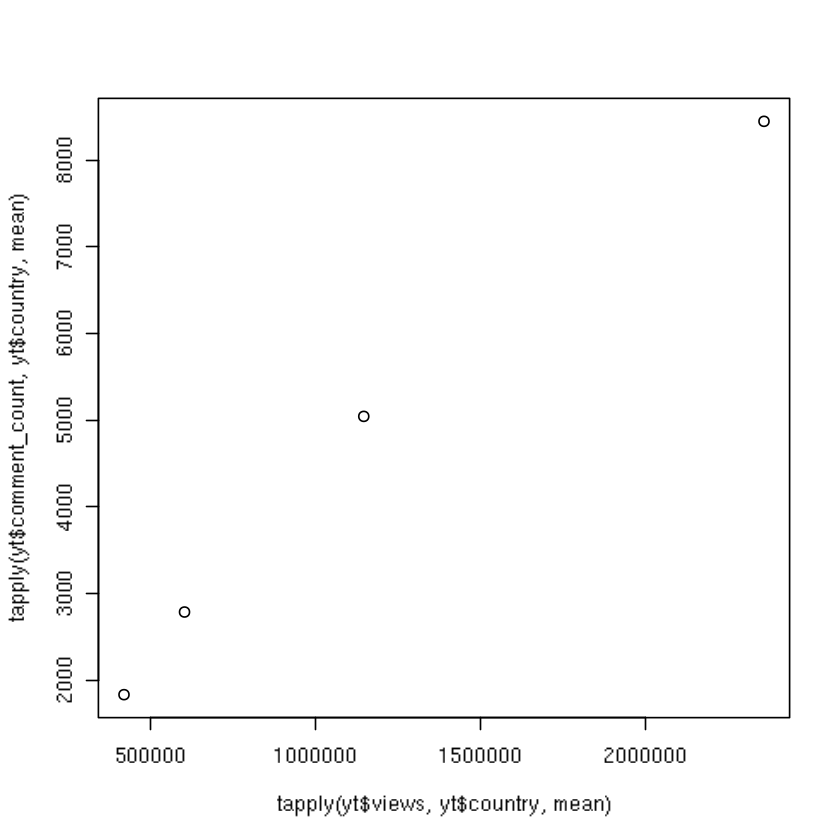

In [8]:
plot(tapply(yt$views, yt$country, mean), tapply(yt$comment_count, yt$country, mean))

In [9]:
tapply(yt$views, yt$country, mean)

CA        DE        FR        US 
1147035.9  603455.3  419921.9 2360784.6

In [10]:
tapply(yt$comment_count, yt$country, mean)

CA       DE       FR       US 
5042.975 2785.857 1832.453 8446.804

In [11]:
table(yt$country)


   CA    DE    FR    US 
40881 40840 40724 40949 

Here we compared the mean value of the views and number of comment with respect to different countries. We can see that the more the average views, the more the average number of comments. It is fair because we are comparing the mean value, and also the samples we collect for each country are approximately the same (almost 40900). 

## Question 5

In [12]:
tapply(yt$n_tags, yt$country, mean)

CA       DE       FR       US 
19.57809 17.97157 14.70290 19.73633

In [13]:
tapply(yt$likes, yt$country, mean)

CA       DE       FR       US 
39582.69 21875.50 17388.86 74266.70

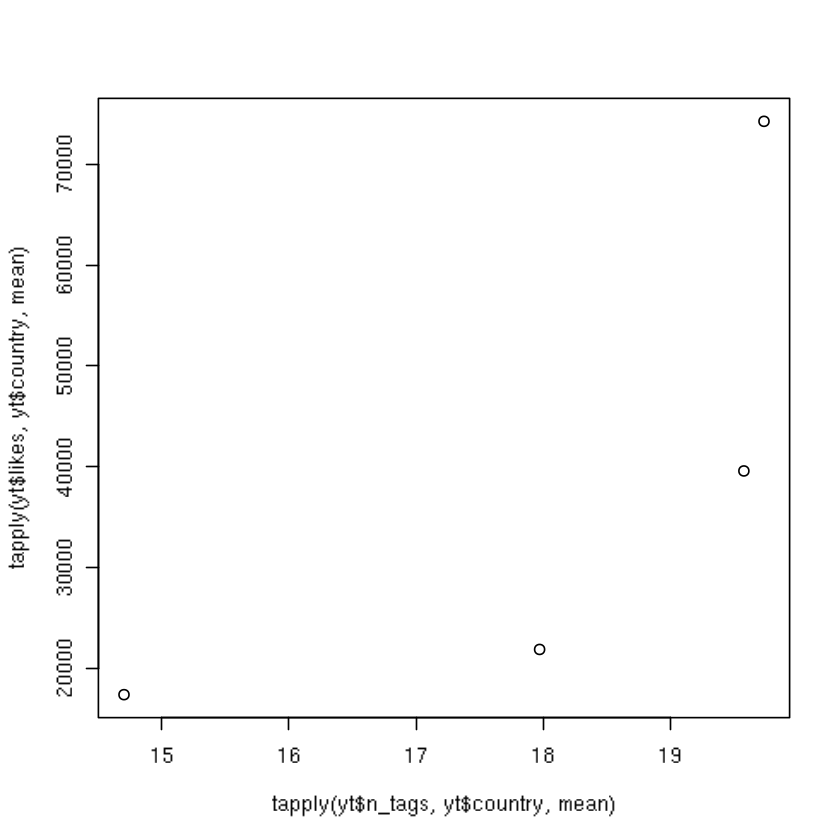

In [14]:
plot(tapply(yt$n_tags, yt$country, mean), tapply(yt$likes, yt$country, mean))

My logic is that the more number of tags, there should be more "likes" because it is more conclusive with many tags. Let's compare those four countries: as we can see, this trend is perfectly applied on this dataset. The country with more average number of tags has more average number of likes. Also, to compare these four countries horizontally, the US has the largest average number of tags and likes, and France has the least average number of tags and likes.

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.